In [69]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = [15, 30]

In [70]:
path = 'C:/Users/user/Pictures/Personal Photo'

In [71]:
img = cv2.imread(f'{path}/pondok.jpg')

In [72]:
#dirubah ke RGB
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

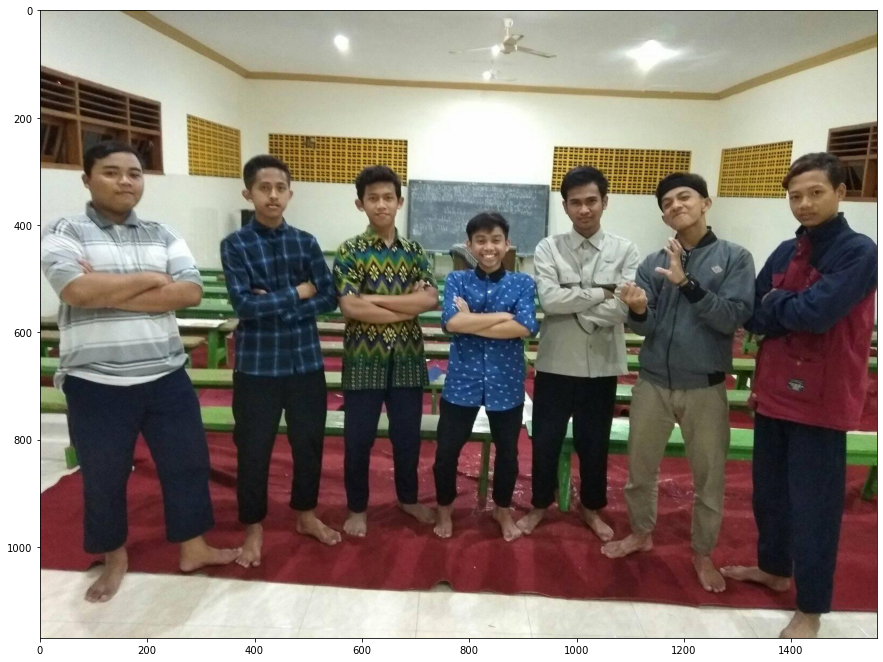

In [73]:
plt.imshow(imgrgb)
plt.show()

# Deteksi Wajah dengan HearCascade 

In [74]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [75]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

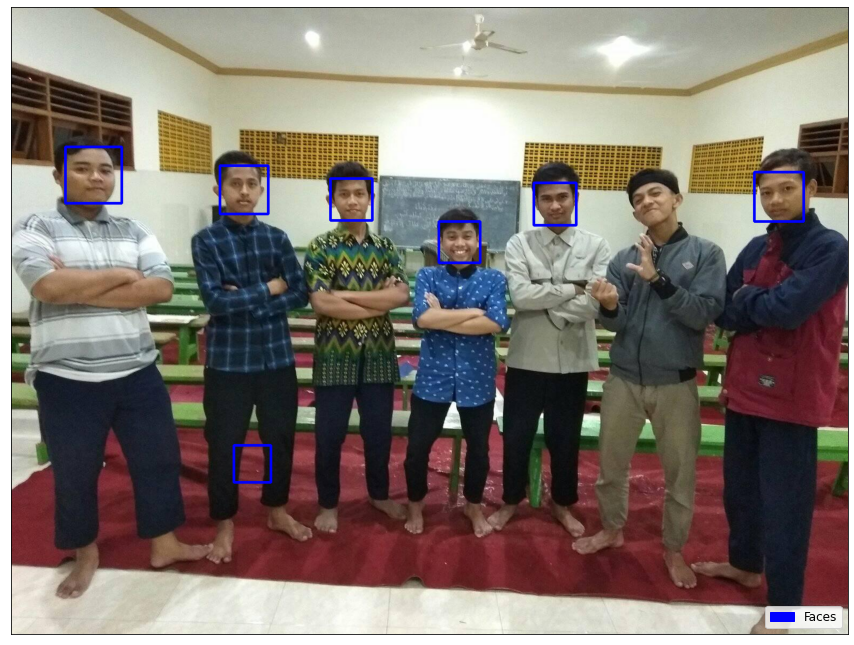

In [76]:
# kotak deteksi pada area wajah
faces = face_cascade.detectMultiScale(
    gray, 
    scaleFactor=1.3, 
    minNeighbors=5
)

for(x, y, w, h) in faces:
    img = cv2.rectangle(
        img, # objek gambar yang akan di tampilkan
        (x, y), # posisi kotak
        (x+w, y+h), # posisi kotak
        (255, 0, 0), # warna kotak (blue)
        3
    )
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

plt.xticks([])
plt.yticks([])

# keterangan label
face_patch = mpatches.Patch(color='blue', label='Faces')
plt.legend(handles=[face_patch],
           loc='lower right', fontsize=12)

# plot gambar 
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Face, Smile, Eyes

In [77]:
# face detector 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# eye detector 
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
# smile detector 
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [78]:
# faces 
faces = face_cascade.detectMultiScale(
    gray, 
    scaleFactor=1.3,
    minNeighbors=5
)
for(x, y, w, h) in faces:
    img = cv2.rectangle(
        img, # gambar
        (x, y), # posisi awal kotak (horizontal dan vertikal)
        (x+w, y+h), # posisi kotak dengan penambahan lebar (w) dan tinggi (h)
        (255, 0, 0), # warna kotak dalam RGB
        3
    )

    # atur region of Interest (ROI) sebagai area target 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # smiles
    smiles = smile_cascade.detectMultiScale(
        roi_gray, 
        minNeighbors=20
    )
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(
            roi_color, # hasil predicted faces
            (sx, sy), # koordinat awal
            (sx+sw, sy+sh), 
            (0, 0, 255), # red
            3 
        )
    # eyes
    eyes = eye_cascade.detectMultiScale(
        roi_gray
    )
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(
            roi_color, 
            (ex, ey), 
            (ex+ew, ey+eh), 
            (0, 255, 255), 
            3)

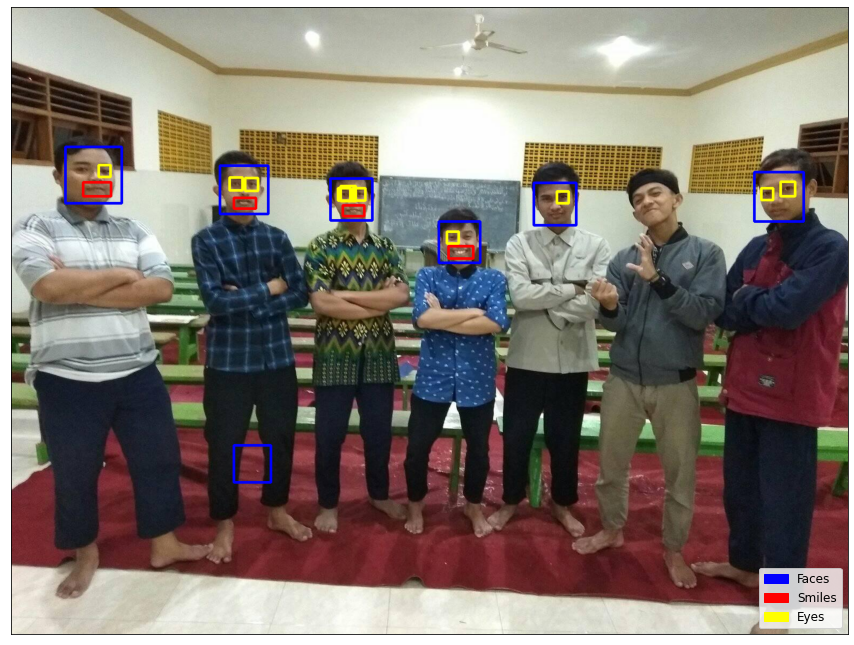

In [79]:
plt.xticks([])
plt.yticks([])
face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')

plt.legend(handles=[face_patch, smile_patch, eye_patch], 
           loc='lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))